In [1]:
# Set working directory

import os

os.chdir ('E:\\Renata Limited\\Data Scientist\\Assignment')

In [2]:
# Import neccesary packages

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage  # Need to use pip install scipy 
import matplotlib.pyplot as plt   # Need to use pip install matplotlib


In [3]:
# Import data set

df = pd.read_csv('New CSV file (Sheet 1).csv')


In [4]:
print (df.head(6))

        ID Customer Name    Division Gender MaritalStatus  Age  Income
0  BU79786     Christine       Dhaka      F       Married   49   56274
1  QZ44356         Susan    Rajshahi      F        Single   34       0
2  AI49188      Margaret      Khulna      F       Married   29   48767
3  WW63253         David    Barishal      M       Married   46       0
4  HB64268         Peter  Mymensingh      M        Single   26   43836
5  OC83172        Judith      Sylhet      F       Married   27   62902


In [15]:
# Remove the 'ID' column from the DataFrame

df = df.drop('ID',
             axis=1)

# Encoding categorical columns (Gender and MaritalStatus) with numerical values

df['Gender'] = df['Gender'].map({'M': 1, 'F': 2})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
df['Division'] = df['Division'].map({'Barishal':1,
                                    'Chattogram':2,
                                    'Dhaka':3,
                                    'Khulna':4,
                                    'Mymensingh':5,
                                    'Rajshahi':6,
                                    'Rangpur':7,
                                    'Sylhet':8})

In [16]:
print (df.head(6))

  Customer Name  Division  Gender  MaritalStatus  Age  Income
0     Christine         3       2              2   49   56274
1         Susan         6       2              1   34       0
2      Margaret         4       2              2   29   48767
3         David         1       1              2   46       0
4         Peter         5       1              1   26   43836
5        Judith         8       2              2   27   62902


In [17]:
from sklearn.cluster import KMeans   # Need to use pip install scikit-learn

In [18]:
# Extract the 'Division' column as input for clustering

DIV = df[['Division']]

In [19]:
# Perform K-means clustering on the 'Division' column

kmeans = KMeans(n_clusters=4,
                n_init=10)  # Explicitly set n_init=10

kmeans.fit(df[['Division']])

KMeans(n_clusters=4, n_init=10)

In [20]:
# Retrieve the cluster labels assigned to each data point

labels = kmeans.labels_

In [21]:
# Add the cluster labels to the DataFrame as named "Cluster"

df['Cluster'] = labels

In [22]:
print (df.head(6))

  Customer Name  Division  Gender  MaritalStatus  Age  Income  Cluster
0     Christine         3       2              2   49   56274        0
1         Susan         6       2              1   34       0        2
2      Margaret         4       2              2   29   48767        0
3         David         1       1              2   46       0        3
4         Peter         5       1              1   26   43836        2
5        Judith         8       2              2   27   62902        1


In [23]:
# Perform hierarchical clustering using complete linkage

linked = linkage(df[['Cluster']],
                 method='complete')

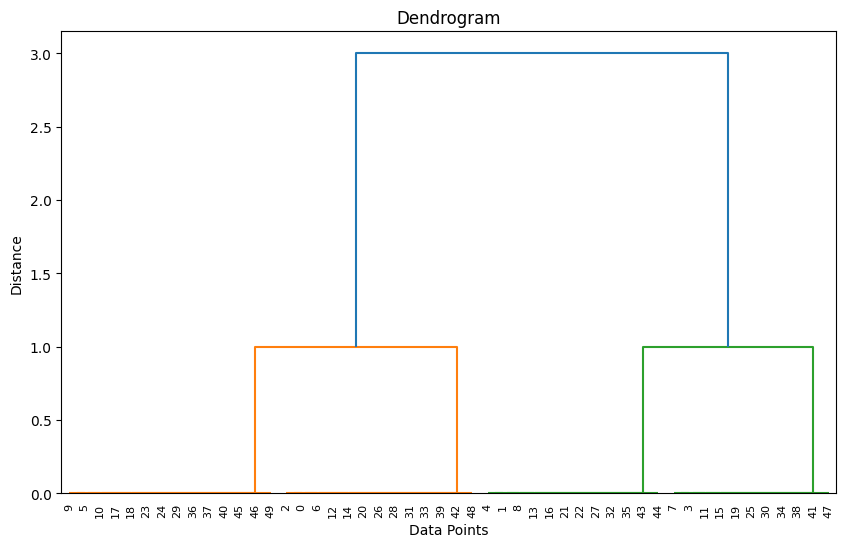

In [26]:
# Plot the dendrogram

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()